In [1]:
import re
import nltk

import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools

import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
import tensorflow
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC

from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Lambda
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from collections import defaultdict
from keras.layers.convolutional import Convolution1D
from keras import backend as K

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.style.use('ggplot')
import sklearn.metrics as metrics

Using TensorFlow backend.


In [11]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.layers import Embedding, Dense, LSTM 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import rhinoMorph

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [15]:
java_home = "C:\Program Files\Java\jdk-14.0.2" 

In [16]:
rn = rhinoMorph.startRhino()

filepath:  C:\Users\MY\Anaconda3\lib\site-packages
classpath:  C:\Users\MY\Anaconda3\lib\site-packages\rhinoMorph/lib/rhino.jar


JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [4]:
df1 = pd.read_csv('./학대별 라벨_1.csv', encoding = 'cp949')
df1
#sample :랜덤 샐플 추출 
# 1 : 정석학대
# 2 : 신체학대
# 3 : 방임
# 4 : 성학대 

,번호,내용,Label
0,1,\n\t\t\t\t\t\t저는 고등학생 여자입니다7살때부터 가정폭력을 당해왔는데요엄...,1
1,1,\n\t\t\t\t\t\t20대 성인 여성입니다. 졸업을 목전에 두고 있는데 아빠의...,1
2,1,\n\t\t\t\t\t\t옛날부터 엄마가 아빠라는 사람한테 가정폭력을 당했습니다 여...,1
3,1,\n1년이라는 짧지 않은 시간 동안 결혼생활이 지옥같았고 그걸 마무리하려고 합니다남...,1
4,1,\n\t\t\t\t\t\t엄마가 돌돌이? 찍찍이로 방 청소 언제 할거냐 여쭤보셔서 ...,1
...,...,...,...
10595,1,\n\t\t\t\t\t\t안녕하세요 4학년 여자입니다 저희 엄마때문에 질문을 하는데...,3
10596,1,\n보통 엄마들은 막 과외도 부쳐주고 ?막 그러자나요 ??그런데 저희 엄마는요 ?성...,3
10597,1,"\n?현재 일반계 고등학교 1학년 학생이고요,엄마는 직장에 다니십니다. 엄마와 학교...",3
10598,1,\n털어넣고 말할게요?우리 엄마가 화투?를 해요?근데 저번에 경찰에 들켰는데 발뺌하...,3


In [5]:
df1 = df1.drop(['번호'], axis = 1)

In [6]:
list1 = df1.values.tolist()

In [7]:
df1['Label'].value_counts()

1    3853
4    3071
2    2805
3     871
Name: Label, dtype: int64

In [8]:
def text_cleaning(doc):
    
    doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", str(doc))
        
    return doc

In [9]:
def define_stopwords(path):
    
    SW = set() 
    #집합형태로 만들어줘야 중복을 제외하고 출력해줌
    #불용어들을 추가할려면 SW.add()이렇게 넣어주면 됨
    
    with open(path, encoding = 'cp949') as f:
        for word in f:
            SW.add(word)
            
    return SW

#with open을 통해 파일을 열고 해당 파일에 있는 단어들을 SW에 넣어줌 

In [10]:
def text_tokenizing(doc):
    return [word for word in rhinoMorph.onlyMorph_list(rn,doc, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False) if word not in a and len(word) > 1]

In [11]:
SW = define_stopwords('./stopwords-ko.txt')

In [12]:
a = [] 
for i in SW:
    a.append(i.replace('\n', ''))

In [13]:
a

['아이고',
 '삐걱',
 '어느',
 '비교적',
 '양자',
 '야',
 '나오',
 '비길수 없다',
 '막론하고',
 '이리하여',
 '공동으로',
 '습니다',
 '하는것이 낫다',
 '어찌하여',
 '에게',
 '남들',
 '보다더',
 '하는바',
 '봐라',
 '비걱거리다',
 '할망정',
 '하구나',
 '우리들',
 '로써',
 '따라',
 '무엇때문에',
 '이렇게말하자면',
 '그러',
 '그렇지 않다면',
 '또',
 '바꾸어말하면',
 '윙윙',
 '비추어 보아',
 '자신',
 '요컨대',
 '허허',
 '할만하다',
 '동안',
 '그런 까닭에',
 '그런즉',
 '총적으로',
 '아이',
 '그중에서',
 '의',
 '예를 들자면',
 '예',
 '대하여',
 '할 줄 안다',
 '비하면',
 '바꾸어말하자면',
 '그위에',
 '뒤따라',
 '연이서',
 '밖에 안된다',
 '할지라도',
 '곧',
 '어떤것들',
 '자기집',
 '관한',
 '몇',
 '전자',
 '형식으로 쓰여',
 '이렇게되면',
 '각종',
 '이 때문에',
 '그리하여',
 '보드득',
 '에 대해',
 '우에 종합한것과같이',
 '쾅쾅',
 '헉',
 '하곤하였다',
 '그렇게',
 '그런데',
 '과연',
 '반드시',
 '하든지',
 '총적으로 보면',
 '하도록하다',
 '주저하지 않고',
 '월',
 '향하다',
 '두번째로',
 '하물며',
 '된이상',
 '여차',
 '어떤',
 '하지 않는다면',
 '만이 아니다',
 '다만',
 '하하',
 '한항목',
 '오히려',
 '알 수 있다',
 '요만한 것',
 '타인',
 '어찌하든지',
 '하도록시키다',
 '전후',
 '하려고하다',
 '조차',
 '않기 위해서',
 '이 되다',
 '에 가서',
 '하여금',
 '주룩주룩',
 '된바에야',
 '소인',
 '지말고',
 '불구하고',
 '흥',
 '이와같다면',
 '사',
 '설사',
 '관련이 있다',
 '해도좋다',
 '그래서',


In [14]:
SW = set(a)

In [15]:
SW.add('카레')
SW.add('엄마')
SW.add('아빠')

In [16]:
len(SW)

611

In [17]:
from konlpy.tag import Mecab
import json
import os
import re
from pprint import pprint

In [18]:
#텍스트 클리닝과 텍스트 토큰화
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
#from konlpy.tag import Okt 보통의 경우에는 Okt를 사용하지 x
import json
import os
import re
from pprint import pprint

# okt = Okt()
# mecab = Mecab()
# kkma = Kkma()
# hannanum = Hannanum()

SW = define_stopwords('./stopwords-ko.txt') # 불용어들을 SW에 저장 

if os.path.exists('Multi_train_docs.json'): #op.path.exists() 어떤 파일이 디렉토리에 있는지 확인하는 함수 있으면 true출력
    with open("Multi_train_docs.json", encoding='utf-8') as f: #if를 만족하면 파일을 불러올 수 있다 
        train_data = json.load(f)
else:
    #토큰화와 클리닝까지 
    #투플은 리스트와 비슷하지만 값은 변경할 수 없다 
    #line[1]을 토큰화하는 이유는 line[1]에 리뷰가 존재
    #클리닝을 먼저하고 토큰화를 하는게 좋다 
    train_data = [(text_tokenizing(text_cleaning(line[0])), line[1])for line in list1 if text_tokenizing(text_cleaning(line[0]))]
    #클리닝을 넣고 토큰화진행  
    #이게 토큰화만 수행하는 코드 train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])] if뒤에는 만약 ㅋㅋㅋ같은거는 토큰화하면 날라가므로 그러면 거기에는 빈 리스트만 존재하니깐 그걸 방지하기 위해
    
    with open("Multi_train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
# if os.path.exists('test_docs.json'):
#     with open("test_docs.json", encoding='utf-8') as f:
#         test_data = json.load(f)
# else:
#     test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
#     #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
#     with open("test_docs.json", 'w', encoding='utf-8') as f:
#         json.dump(test_data, f, ensure_ascii=False, indent='\t')

# pprint(train_data[0])
# pprint(test_data[0])

In [19]:
import nltk
total_tokens = [token for doc in train_data for token in doc]
len(total_tokens)

21162

In [20]:
Senti = [] 
for i in range(len(train_data)):
    Senti.append(train_data[i][1])

In [21]:
Senti = pd.DataFrame(Senti)

In [22]:
Senti

,0
0,1
1,1
2,1
3,1
4,1
...,...
10576,3
10577,3
10578,3
10579,3


In [23]:
Senti.rename(columns = { 0 : 'Label'}, inplace = True)

In [24]:
Senti

,Label
0,1
1,1
2,1
3,1
4,1
...,...
10576,3
10577,3
10578,3
10579,3


In [25]:
labels = Senti['Label']

classes = sorted(labels.unique())
classes

[1, 2, 3, 4]

In [26]:
label_to_cat = dict()
for i in range(len(classes)):
    dummy = np.zeros((len(classes),), dtype = 'int8')
    dummy[i] = 1
    label_to_cat[classes[i]] = dummy
    
label_to_cat

{1: array([1, 0, 0, 0], dtype=int8),
 2: array([0, 1, 0, 0], dtype=int8),
 3: array([0, 0, 1, 0], dtype=int8),
 4: array([0, 0, 0, 1], dtype=int8)}

In [27]:
y = np.array([label_to_cat[label] for label in Senti.Label])
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]], dtype=int8)

In [28]:
Text = []
for i in range(len(train_data)):
    Text.append(train_data[i][0])

In [29]:
print(len(y))
print(len(Text))

10581
10581


### LSTM

In [30]:
max_words = 5000
max_len = 100
Batch_size = 32
Epochs = 20

### ================================

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Activation, SimpleRNN
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors

In [32]:
embeddings = Word2Vec(size=200, min_count=3, window = 3)
embeddings.build_vocab([sentence for sentence in Text])
embeddings.train([sentence for sentence in Text],
                 total_examples=embeddings.corpus_count,
                 epochs=embeddings.epochs)

(3797258, 4237810)

In [33]:
embeddings.save('Multi_Embedding_크롤링10000개.model')
print('완료')

완료


In [34]:
vocab = dict(embeddings.wv.most_similar('상처'))

In [35]:
X = embeddings[vocab]

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from sklearn.manifold import TSNE

In [37]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

In [38]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

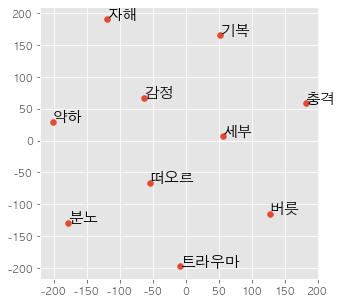

In [39]:
fig = plt.figure()
fig.set_size_inches(5, 5)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos,fontsize=15)
    
plt.show()

In [40]:
def encode_sentence_lstm(tokens, emb_size):
    vec = np.zeros((80, 200))
    #maxlen = 80이고 컬럼이 200?
    for i, word in enumerate(tokens):
        if i > 79:
            break
        try:
            vec[i] = embeddings.wv[word].reshape((1, emb_size))
        except KeyError:
            continue
    return vec

In [41]:
X = np.array([encode_sentence_lstm(ele, 200) for ele in map(lambda x: x, Text)])

train_text, test_text, train_senti, test_senti = train_test_split(X, y, stratify = y)

In [42]:
train_text.shape

(7935, 80, 200)

In [43]:
len(train_text)

7935

In [44]:
len(train_senti)

7935

### =====================================

In [45]:
import keras.utils
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras import backend as K
from keras.engine import Layer
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, LSTM, GRU, LeakyReLU, Dropout
from keras.layers import  Embedding, Bidirectional
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [68]:
input_tensor = Input(shape=(80,200))
x = Bidirectional(LSTM(256, return_sequences = True, dropout = 0.2))(input_tensor)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation='relu')(x)

output_tensor = Dense(4, activation='softmax')(x)

model = Model(inputs=[input_tensor], outputs=[output_tensor])

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 80, 200)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 80, 512)           935936    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040

input_tensor = Input(shape=(80,200))
x = Bidirectional(LSTM(256, return_sequences = True, dropout = 0.2))(input_tensor)
x = Bidirectional(LSTM(128, return_sequences = False, dropout = 0.2))(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(16, activation='relu')(x)

output_tensor = Dense(4, activation='softmax')(x)

model = Model(inputs=[input_tensor], outputs=[output_tensor])

model.summary()

### 일단 실행하지마셈 

In [69]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)

In [70]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
history = model.fit(train_text, train_senti, epochs=20, verbose=1, batch_size = 32, validation_data = (test_text, test_senti), callbacks = [earlystopper])


ValueError: Error when checking target: expected dense_8 to have 3 dimensions, but got array with shape (7935, 4)

In [50]:
score, acc = model.evaluate(test_text, test_senti, verbose = 1)

2646/2646 [==============================] - 9s 3ms/step


In [51]:
print('Test Score:' , score)
print('Test Accuracy:' , acc)

Test Score: 0.5660406172681017
Test Accuracy: 0.8027210831642151


In [52]:
import matplotlib.pyplot as plt
from math import pi

In [53]:
pred_probs = model.predict(train_text)

In [54]:
print(np.round(pred_probs[:10],3))

[[0.474 0.079 0.441 0.006]
 [0.993 0.004 0.001 0.002]
 [0.934 0.062 0.002 0.003]
 [0.002 0.951 0.046 0.001]
 [0.189 0.14  0.629 0.042]
 [0.004 0.004 0.    0.992]
 [0.885 0.072 0.025 0.018]
 [0.    0.    0.    1.   ]
 [0.199 0.31  0.018 0.473]
 [0.684 0.294 0.015 0.007]]


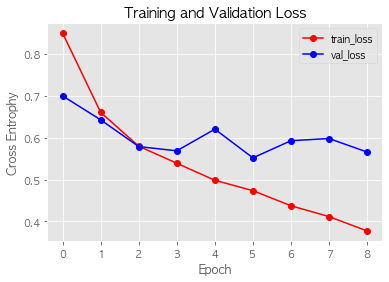

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label = 'train_loss')
plt.plot(val_loss, 'bo-', label = 'val_loss')
plt.ylabel('Cross Entrophy')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')
plt.show()

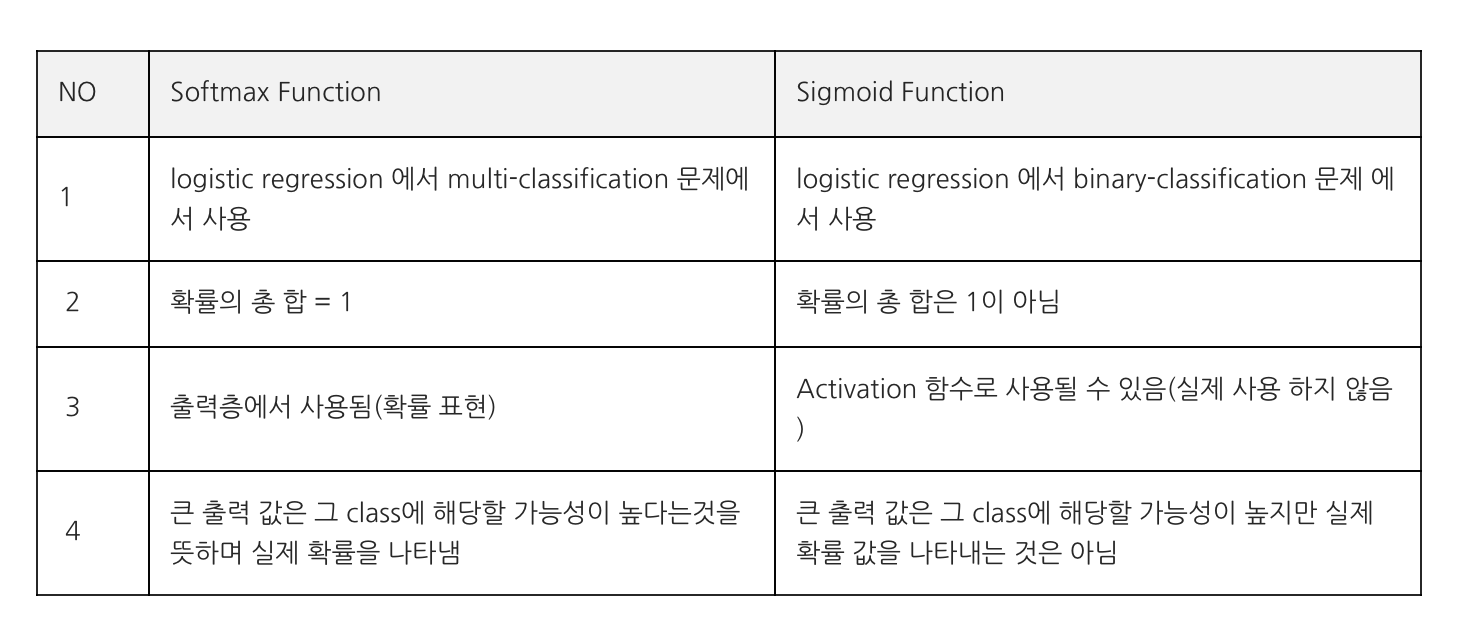

### Test

In [57]:
def sentiment_predict(new_sentence):
    if new_sentence != '':
        new_sentence1 = text_cleaning(new_sentence)
        new_sentence2 = rhinoMorph.onlyMorph_list(rn,new_sentence1, pos = ['NNG', 'NNP','NP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi = False)
        new_sentence3 = [word for word in new_sentence2 if not word in SW] # 불용어 제거
        if new_sentence3 != []:
            X = np.array([encode_sentence_lstm(new_sentence3,200)])
            pred_probs = model.predict(X) # 예측
            
            categories = ['정서학대', '신체학대','방임', '성학대']

            N = len(categories)

            values = np.round(pred_probs, 3).flatten().tolist()
            values += values[:1]

            angles = [n / float(N) * 2 * pi for n in range(N)]
            angles += angles[:1]

            plt.polar(angles, values)
            plt.fill(angles, values, alpha = 0.5)
            plt.xticks(angles[:-1], categories)

            plt.yticks([0,0.5, 1.0])
            plt.ylim(0,1)
            
            plt.show()

In [73]:
doc = input()
#엄마가 내몸을 만지고 아빠가 나를 때렸어요.

엄마가 제 몸을 자꾸 만지고 훑어봐요 아빠는 나를 자꾸 때립니다 정신적으로 너무 힘들어요.... 우울합니다


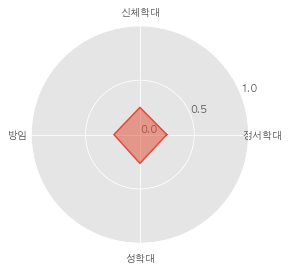

In [74]:
sentiment_predict(doc)

In [60]:
model_json = model.to_json()
with open('./Multi_model.json', 'w') as json_file:
    json_file.write(model_json)

In [61]:
model.save_weights('./Multi_weight.h5')